## Skewness

Skewness is a measure of the asymmetry of a dataset’s distribution. It quantifies how much the data deviates from a perfectly symmetric, bell-shaped normal distribution.
* ｜Skewness｜< 0.5: Approximately symmetric distribution.
* 0.5<=｜Skewness｜< 1: Mildly skewed distribution.
* ｜Skewness｜>= 1: Severely skewed distribution.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("movie_psychology_threeDimensions_ECN_Avg.csv")

In [3]:
data.head()

,user_id,Extraversion_Avg,Conscientiousness_Avg,Neuroticism_Avg,E1,E2,E3,E4,E5,E6,...,C3,C4,C5,N1,N2,N3,N4,gender,Movie_watching_frequency,favorite_genre
0,262,3.67,3.8,4.00,4,4,4,2,4,4,...,4,4,4,4,4,4,4,male,several times a week,"comedy,action,sci-fi"
1,261,2.17,3.4,2.75,1,2,2,3,3,2,...,4,3,3,2,2,4,3,female,At least once a week,"comedy,romance,horror,mystery,historical"
2,260,2.83,3.2,3.25,1,4,3,3,3,3,...,3,3,3,4,3,3,3,male,Less than once a month,comedy
3,259,3.00,3.6,3.50,4,4,2,4,2,2,...,4,4,3,4,4,3,3,female,Less than once a month,"comedy,romance,mystery,drama"
4,258,3.83,4.4,2.00,5,4,4,5,3,2,...,5,4,4,2,2,2,2,female,Less than once a month,historical


In [4]:
from scipy.stats import skew


extraversion_skewness = skew(data["Extraversion_Avg"])
conscientiousness_skewness = skew(data["Conscientiousness_Avg"])
neuroticism_skewness = skew(data["Neuroticism_Avg"])

print(f"Extraversion Skewness: {extraversion_skewness}")
print(f"Conscientiousness Skewness: {conscientiousness_skewness}")
print(f"Neuroticism Skewness: {neuroticism_skewness}")

Extraversion Skewness: -0.031766919665876116
Conscientiousness Skewness: -0.05700201361526429
Neuroticism Skewness: -0.14486502140806598


## histogram

Using a Histogram to Check Normality:
* A normal distribution will appear as a bell-shaped curve, symmetric around the mean.
* The bars should taper off evenly on both sides of the central peak.
* The frequency of data points should gradually decrease as you move further from the center.

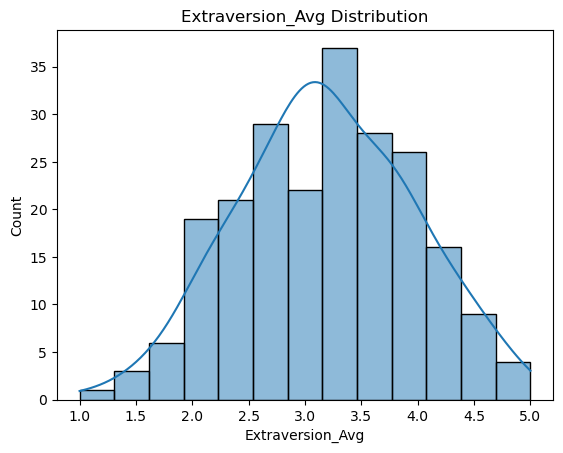

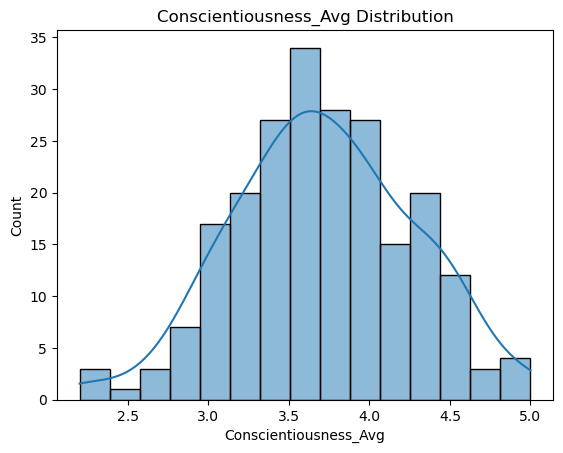

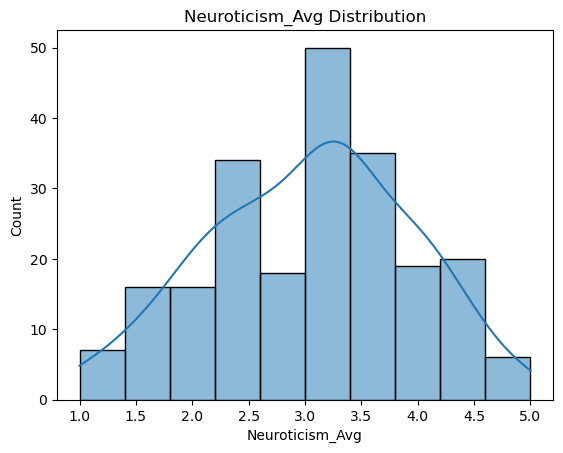

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ["Extraversion_Avg", "Conscientiousness_Avg", "Neuroticism_Avg"]:
    sns.histplot(data[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

## QQ Plot

Using a QQ Plot to Check Normality:
* If the data follows a normal distribution, the points in the QQ plot will align closely with the red diagonal line.
* Deviations from the line, particularly in the tails (extreme ends), indicate departures from normality.


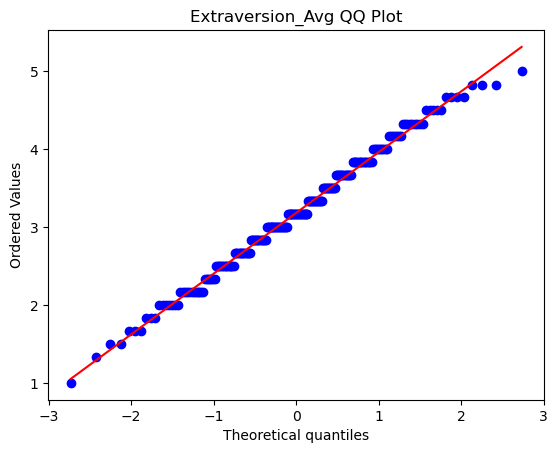

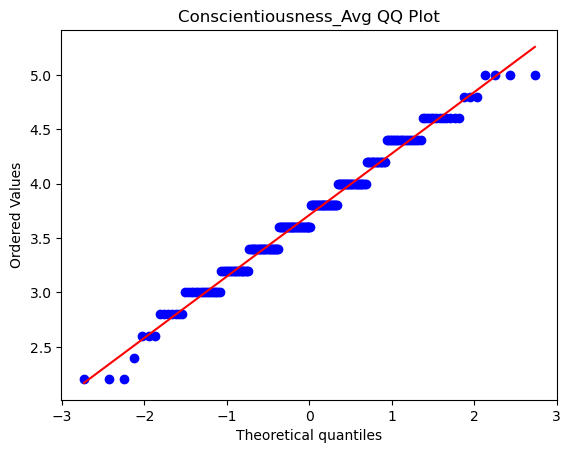

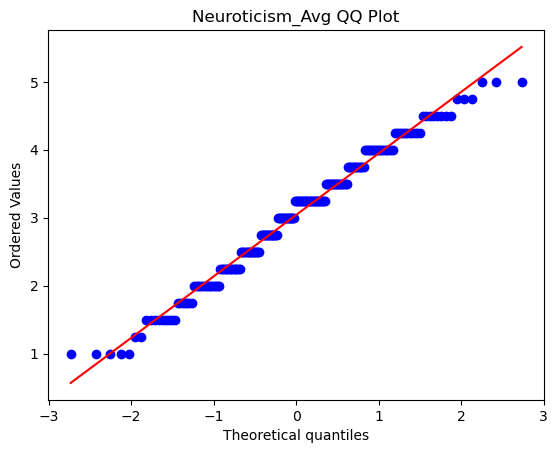

In [7]:
from scipy.stats import probplot

for col in ["Extraversion_Avg", "Conscientiousness_Avg", "Neuroticism_Avg"]:
    probplot(data[col], dist="norm", plot=plt)
    plt.title(f"{col} QQ Plot")
    plt.show()

## Dividing score ranges into categories

In [8]:
def calculate_ranges(df, columns):
    ranges = {}
    for col in columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        low_threshold = mean - std_dev
        high_threshold = mean + std_dev
        ranges[col] = {
            "Low Range": f"< {low_threshold:.2f}",
            "Medium Range": f"{low_threshold:.2f} - {high_threshold:.2f}",
            "High Range": f"> {high_threshold:.2f}"
        }
    return ranges

dimensions = ["Extraversion_Avg", "Conscientiousness_Avg", "Neuroticism_Avg"]

ranges = calculate_ranges(data, dimensions)
for dimension, range_info in ranges.items():
    print(f"{dimension}:")
    for key, value in range_info.items():
        print(f"  {key}: {value}")

Extraversion_Avg:
  Low Range: < 2.41
  Medium Range: 2.41 - 3.96
  High Range: > 3.96
Conscientiousness_Avg:
  Low Range: < 3.15
  Medium Range: 3.15 - 4.28
  High Range: > 4.28
Neuroticism_Avg:
  Low Range: < 2.14
  Medium Range: 2.14 - 3.94
  High Range: > 3.94
